# Estimação pontual

Este notebook contém os experimentos de estimação pontual.

In [4]:
import numpy as np
from scipy.special import hyp2f1
import matplotlib.pyplot as plt

## Correlação normal multivariada

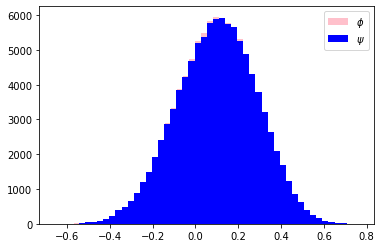

In [26]:
# Parâmetros
rho = 0.1
n = 30
M = 100000
phi_samples = np.zeros(M)
psi_samples = np.zeros(M)
# Gerando os dados de acordo com a distribuição especificada
rng = np.random.RandomState(1001)
for i in range(M):
    Z = rng.multivariate_normal(mean=[0,0], cov=[[1,rho], [rho,1]], size=n)
    X = Z[:,0]
    Y = Z[:,1]
    # Calculando ~ correlação de Pearson
    phi_samples[i] = np.corrcoef(X,Y)[0,1]
    psi_samples[i] = phi_samples[i] * hyp2f1(1/2, 1/2, (n-1)/2, 1 - phi_samples[i]**2)

# Desenhando as distribuições
plt.hist(phi_samples, label=r'$\phi$', color='pink', bins=50)
plt.hist(psi_samples, label=r'$\psi$', color='blue', bins=50)
plt.legend()
plt.show()

Nesse caso, temos que o Erro Absoluto Percentual Médio do estimador $\psi$ é, aproximadamente,  
$$
\mathbb{E}_{\rho}\left[\bigg|\frac{\psi - \rho}{\rho}\bigg|\right] \approx 150\%.
$$